In [ ]:
!pip install scikit-learn

Explained Variance Ratios: [0.44272026 0.18971182]


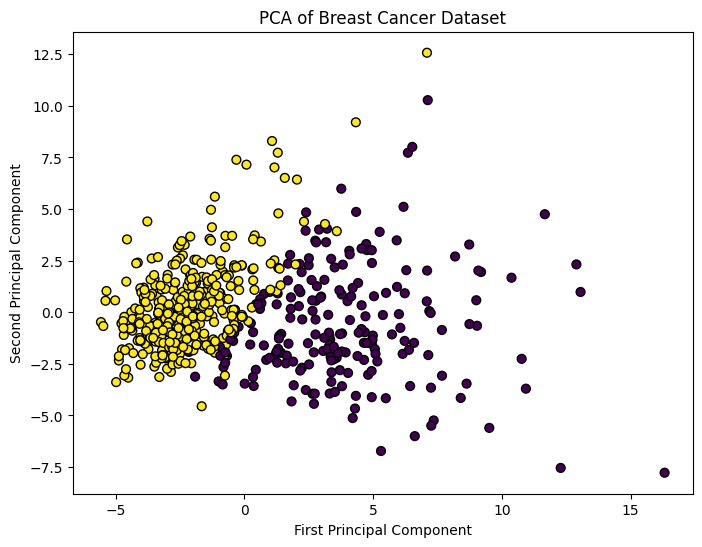

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Display the explained variance ratio of the principal components
print(f"Explained Variance Ratios: {pca.explained_variance_ratio_}")

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

Mean Vector: [-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15]

Eigenvalues:
[5.48823339e+00 2.52314794e+00 8.82165558e-01 4.99887973e-01
 3.73195069e-01 1.24360308e-01 8.02263057e-02 2.82802905e-04
 1.11550653e-02 3.49512185e-02]

Eigenvectors:
[[-3.63937928e-01  3.13929073e-01 -1.24427591e-01  2.95588577e-02
  -3.10670221e-02  2.64180150e-01 -4.41883913e-02 -6.69071489e-01
   4.74425305e-01  8.48340616e-02]
 [-1.54451129e-01  1.47180909e-01  9.51056590e-01  8.91608372e-03
  -2.19922761e-01  3.22065722e-02  2.05574778e-02  2.49782620e-04
   4.21262904e-03 -7.12679750e-03]
 [-3.76044342e-01  2.84657885e-01 -1.14083596e-01  1.34580689e-02
  -5.94508115e-03  2.37819464e-01 -8.33692281e-02  7.40490534e-01
   3.80167210e-01  8.92588790e-02]
 [-3.64085847e-01  3.04841714e-01 -1.23377857e-01  1.34426819e-02
  -1.93412222e-02  3.31707454e-01  2.61187963e-01 -3.23589585e-02
  -7.47

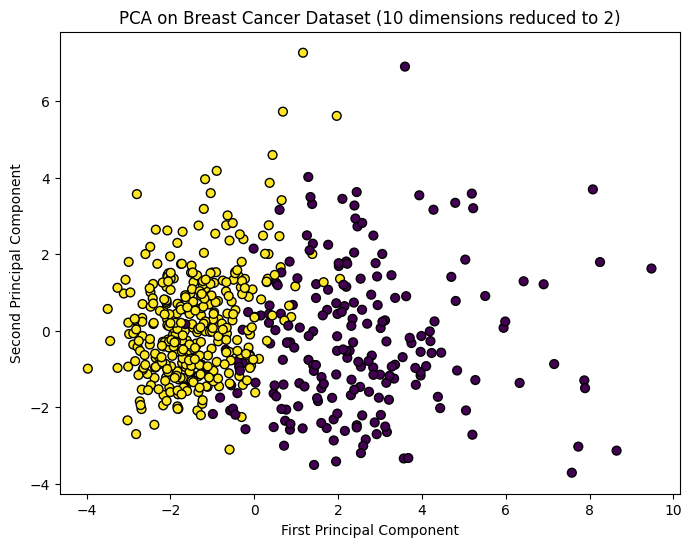

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the dataset (multidimensional data - 30 features in the breast cancer dataset)
data = load_breast_cancer()
X, y = data.data, data.target

# Select the first 10 features (or any 10 features of your choice)
X_10_features = X[:, :10]  # Taking the first 10 dimensions

# Step 2: Standardize the data (preprocessing)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_10_features)

# Step 3: Compute the mean of the dataset
mean_vec = np.mean(X_scaled, axis=0)
print(f"Mean Vector: {mean_vec}\n")

# Step 4: Find the covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Step 5: Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f"Eigenvalues:\n{eigenvalues}\n")
print(f"Eigenvectors:\n{eigenvectors}\n")

# Step 6: Sort eigenvalues and corresponding eigenvectors in decreasing order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Step 7: Create the transformation matrix (rows corresponding to the largest eigenvalues)
transformation_matrix = eigenvectors_sorted[:, :2]  # Take the top 2 eigenvectors
print(f"Transformation Matrix (Top 2 Eigenvectors):\n{transformation_matrix}\n")

# Step 8: Transform the dataset into new 2D datapoints
X_pca_manual = X_scaled.dot(transformation_matrix)

# Alternatively, use PCA from sklearn to verify the result
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 9: Display the explained variance ratio using sklearn PCA
print(f"Explained Variance Ratios (sklearn PCA): {pca.explained_variance_ratio_}")

# Step 10: Scatterplot of the new 2D dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on Breast Cancer Dataset (10 dimensions reduced to 2)')
plt.show()